In [1]:
import pandas as pd
import numpy as np

In [2]:
file = "../data/train_job.csv"

# read a csv file where the columnas are delimitted by # and load this to a dataframe
# // Generated by WCA for GP
import pandas as pd

# Load the CSV file into a Pandas data frame
df = pd.read_csv(file, delimiter='#',header=None)

In [3]:
df.head()

,0,1,2,3,4
0,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,number-in-title,cn.country_code,=,...",130320.0,62824.0
1,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,number-in-title,cn.country_code,=,...",62824.0,62824.0
2,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,fire-extinguisher,cn.country_code,...",62816.0,62812.0
3,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,helicopter,cn.country_code,=,[us],...",62812.0,62813.0
4,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","cn.country_code,=,[do],k.keyword,=,band,ct.kin...",42875.0,42829.0


# Labeling queries based on memory usage level

In [4]:
num_templates = 20

labels = []

for t in range(num_templates):
    labels.append('T{}'.format(t+1))

print(labels)

['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20']


In [5]:
df[4]


0       62824.0
1       62824.0
2       62812.0
3       62813.0
4       42829.0
         ...   
2264    62814.0
2265    62813.0
2266    62812.0
2267    62812.0
2268    62813.0
Name: 4, Length: 2269, dtype: float64

In [6]:
df['actual'] =df[4]

In [7]:
len(np.unique(df['actual']))

613

In [8]:
## grouping based on the memory utilization
pd.qcut(np.unique(df['actual']), q=num_templates)

[(3875.999, 14183.6], (3875.999, 14183.6], (3875.999, 14183.6], (3875.999, 14183.6], (3875.999, 14183.6], ..., (43467.8, 62890.0], (43467.8, 62890.0], (43467.8, 62890.0], (43467.8, 62890.0], (43467.8, 62890.0]]
Length: 613
Categories (20, interval[float64, right]): [(3875.999, 14183.6] < (14183.6, 14262.2] < (14262.2, 15919.6] < (15919.6, 17438.8] ... (43031.8, 43119.6] < (43119.6, 43336.8] < (43336.8, 43467.8] < (43467.8, 62890.0]]

In [9]:
# Generated by WCA for GP
df['template'] = pd.qcut(df['actual'], q=num_templates, labels=False, duplicates='drop')

In [26]:
## original groups
df['template'].value_counts()

12    560
0     284
13    122
8     115
3     115
11    114
2     114
6     114
9     113
7     113
4     113
14    112
10    112
5     109
1      59
Name: template, dtype: int64

In [27]:
## for each template, select only 100 records ( This is a variable depends on the groups and datasets)
# then concat the records again
mydfs = []
for t in df.template.unique():
    mydfs.append(
        df[df.template==t].iloc[:100]
    )
df2=pd.concat(mydfs, axis=0)

In [28]:
len(df['template'].unique())

15

In [29]:
df.head()

,0,1,2,3,4,actual,template
0,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,number-in-title,cn.country_code,=,...",130320.0,62824.0,62824.0,14
1,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,number-in-title,cn.country_code,=,...",62824.0,62824.0,62824.0,14
2,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,fire-extinguisher,cn.country_code,...",62816.0,62812.0,62812.0,12
3,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,helicopter,cn.country_code,=,[us],...",62812.0,62813.0,62813.0,13
4,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","cn.country_code,=,[do],k.keyword,=,band,ct.kin...",42875.0,42829.0,42829.0,10


In [30]:
## After selection
df2.template.value_counts()

14    100
12    100
13    100
10    100
9     100
7     100
11    100
8     100
3     100
5     100
2     100
6     100
4     100
0     100
1      59
Name: template, dtype: int64

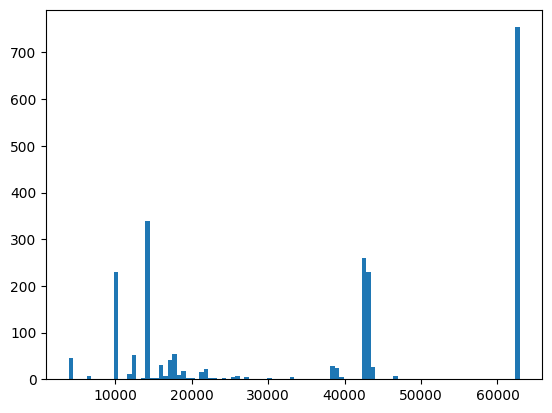

In [33]:
# Generated by WCA for GP
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
# data = np.random.randn(1000)
data = df['actual'].values

# Plot the data using the histogram function
plt.hist(data, bins=100)

# Show the plot
plt.show()


# Trying min and max and linspace to find better binning

In [34]:
min_value = df['actual'].min()
max_value = df['actual'].max()

bins = np.linspace(min_value, max_value, 11)
print(bins)


[ 3876.   9777.4 15678.8 21580.2 27481.6 33383.  39284.4 45185.8 51087.2
 56988.6 62890. ]


In [22]:
#len(bins)

In [23]:
#labels[:15]

In [20]:
##df['bins'] = pd.cut(df['actual'], bins=bins, labels=labels[:10], include_lowest=True, duplicates='drop') #duplicates='drop'

In [21]:
#df['bins'].value_counts()

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [25]:
df

,0,1,2,3,4,actual,template
0,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,number-in-title,cn.country_code,=,...",130320.0,62824.0,62824.0,14
1,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,number-in-title,cn.country_code,=,...",62824.0,62824.0,62824.0,14
2,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,fire-extinguisher,cn.country_code,...",62816.0,62812.0,62812.0,12
3,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,helicopter,cn.country_code,=,[us],...",62812.0,62813.0,62813.0,13
4,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","cn.country_code,=,[do],k.keyword,=,band,ct.kin...",42875.0,42829.0,42829.0,10
...,...,...,...,...,...,...,...
2264,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,acronym-in-title,cn.country_code,=...",62812.0,62814.0,62814.0,14
2265,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,acronym-in-title,cn.country_code,=...",62812.0,62813.0,62813.0,13
2266,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,number-in-title,cn.country_code,=,...",62812.0,62812.0,62812.0,12
2267,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,after-school-special,cn.country_co...",62812.0,62812.0,62812.0,12


In [31]:
X = df2.iloc[:,0:6]

In [32]:
y = df2.iloc[:,6:7]

In [33]:
y

,template
0,14
1,14
10,14
12,14
40,14
...,...
947,0
949,0
951,0
953,0


In [34]:
X

,0,1,2,3,4,actual
0,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,number-in-title,cn.country_code,=,...",130320.0,62824.0,62824.0
1,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,number-in-title,cn.country_code,=,...",62824.0,62824.0,62824.0
10,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,superhero,cn.country_code,=,[us],c...",62812.0,62835.0,62835.0
12,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","k.keyword,=,superhero,cn.country_code,=,[us],c...",62813.0,62814.0,62814.0
40,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","cn.country_code,=,[ca],k.keyword,=,based-on-tv...",62812.0,62818.0,62818.0
...,...,...,...,...,...,...
947,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.co...","cn.country_code,=,nan,t.production_year,>,1950",131603.0,3876.0,3876.0
949,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.co...","t.production_year,>,1950,cn.country_code,=,[us]",131603.0,9951.0,9951.0
951,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.co...","t.production_year,>,1950,cn.country_code,=,[us]",131603.0,9951.0,9951.0
953,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.co...","cn.country_code,=,nan,t.production_year,>,1950",131603.0,3876.0,3876.0


In [38]:
## suggested splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
X_train

,0,1,2,3,4,actual
308,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","ct.kind,=,productioncompanies,k.keyword,=,titl...",42875.0,43049.0,43049.0
248,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","cn.country_code,=,[tr],k.keyword,=,love,ct.kin...",42875.0,43154.0,43154.0
708,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.co...","t.production_year,>,1950,cn.country_code,=,[ch]",131603.0,14193.0,14193.0
1811,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.mo...","cn.country_code,=,[fi],k.keyword,=,non-fiction...",42875.0,42676.0,42676.0
1436,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.co...","cn.country_code,=,[gb],t.production_year,>,1950",131303.0,28382.0,28382.0
...,...,...,...,...,...,...
1404,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.co...","t.production_year,>,1950,cn.country_code,=,[us]",131052.0,14175.0,14175.0
573,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.co...","t.production_year,>,1950,cn.country_code,=,[hu]",131603.0,17856.0,17856.0
628,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.co...","cn.country_code,=,[fi],t.production_year,>,1950",131603.0,14235.0,14235.0
807,"company_name cn, company_type ct, keyword k...","ml.movie_id=mk.movie_id,t.id=mc.movie_id,mc.co...","t.production_year,>,1950,cn.country_code,=,[us]",131603.0,14177.0,14177.0
